In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

warnings.filterwarnings("ignore")

/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv
/kaggle/input/human-stress-detection-in-and-through-sleep/IEEE-TCE_2020-08-0175_SaYoPillow.pdf
/kaggle/input/human-stress-detection-in-and-through-sleep/readme.docx


# Read Data in and do head

In [2]:
np.random.seed(42)
dataset = pd.read_csv("../input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")

dataset.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Change names of columns


In [3]:
dataset = dataset.rename(columns={"sr" : "Snoring Rate", "rr" : "Respiration Rate", "t": "Body Temp", "lm" : "Limb Movement",
                       "bo" : "Blood Oxygen", "rem" : "Eye Movement", "sr.1" : "Sleeping Hours", "hr" : "Heart Rate", "sl" : "Stress Level"})

dataset.head()

,Snoring Rate,Respiration Rate,Body Temp,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Show distribution of the categories

Text(0, 0.5, 'Counts')

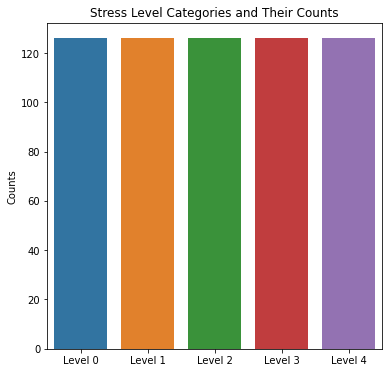

In [4]:
stress_0 = dataset[dataset["Stress Level"] == 0]
stress_1 = dataset[dataset["Stress Level"] == 1]
stress_2 = dataset[dataset["Stress Level"] == 2]
stress_3 = dataset[dataset["Stress Level"] == 3]
stress_4 = dataset[dataset["Stress Level"] == 4]

stress_level_categories = ["Level 0", "Level 1", "Level 2", "Level 3", "Level 4"]

stress_level_distribution = [len(stress_0), len(stress_1), len(stress_2), len(stress_3), len(stress_4)]

plt.figure(figsize=[6, 6])
sns.barplot(x=stress_level_categories, y=stress_level_distribution)

plt.title("Stress Level Categories and Their Counts")
plt.ylabel("Counts")

# Exploratory Data Analysis (plot average sleep for each category with seaborn barplot)

Text(0, 0.5, 'Average Hours of Sleep')

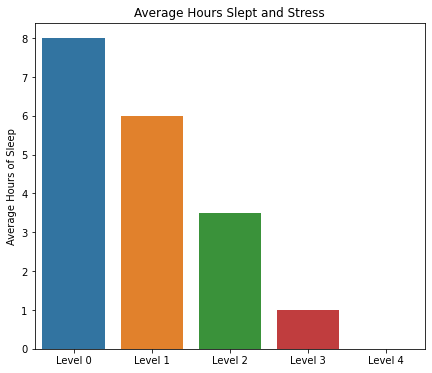

In [5]:
stress_0_sleep = np.mean(stress_0["Sleeping Hours"])
stress_1_sleep = np.mean(stress_1["Sleeping Hours"])
stress_2_sleep = np.mean(stress_2["Sleeping Hours"])
stress_3_sleep = np.mean(stress_3["Sleeping Hours"])
stress_4_sleep = np.mean(stress_4["Sleeping Hours"])

sleep_per_stress_level = [stress_0_sleep, stress_1_sleep, stress_2_sleep, stress_3_sleep, stress_4_sleep]

plt.figure(figsize=[7, 6])
plt.title("Average Hours Slept and Stress")
sns.barplot(x=stress_level_categories, y=sleep_per_stress_level)

plt.ylabel("Average Hours of Sleep")

# Correlation heatmap sns.heatmap(df.corr())

<AxesSubplot:>

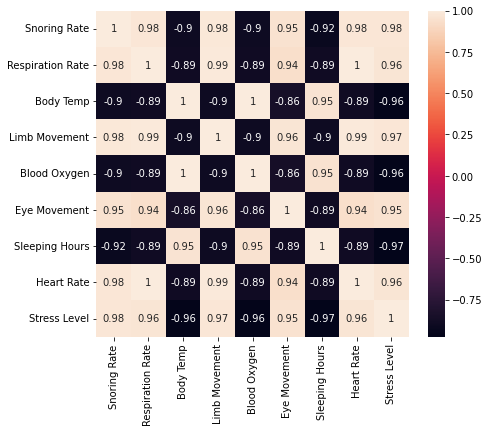

In [6]:
plt.figure(figsize=[7, 6])
sns.heatmap(dataset.corr(), annot=True)

# Snoring rate, limb movement, and sleeping hours have the highest correlations, including both positive and negative. The paper mentioned snoring rate being an important feature to use.

<AxesSubplot:xlabel='Limb Movement', ylabel='Density'>

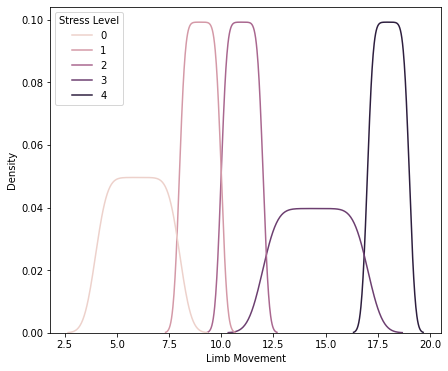

In [7]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=dataset, x="Limb Movement", hue="Stress Level")

# KDEPLOT shows high limb movement equals high stress.

Text(0, 0.5, 'Body Temperature (F)')

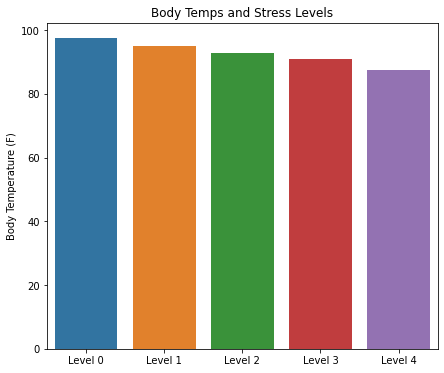

In [8]:
body_temps = [stress_0["Body Temp"].mean(), stress_1["Body Temp"].mean(), stress_2["Body Temp"].mean(), stress_3["Body Temp"].mean(), stress_4["Body Temp"].mean()]


plt.figure(figsize=[7, 6])
plt.title("Body Temps and Stress Levels")
sns.barplot(x=stress_level_categories, y=body_temps)
plt.ylabel("Body Temperature (F)")

# As stress increases, body temperature descreases.

# 

# train test split to get X_train, X_test, y_train, y_test. Check distribution after split.

In [9]:
from sklearn.model_selection import train_test_split

np_dataset = dataset.to_numpy()
all_x = np_dataset[:,0:8]
all_y = np_dataset[:,8]

train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=.33)

# Train RandomForest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_start = time.time()
RFmodel = RandomForestClassifier()
RFmodel.fit(train_x, train_y)
rf_stop = time.time()

# Train Gradient Boosting Classifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_start = time.time()
GBCmodel = GradientBoostingClassifier()
GBCmodel.fit(train_x, train_y)
gbc_stop = time.time()

# Train XGBoost Classifier

In [12]:
import xgboost as xgb

xgb_start = time.time()
XGBmodel = xgb.XGBClassifier()
XGBmodel.fit(train_x, train_y)
xgb_stop = time.time()

[23:31:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# train test each model (if we have time try MLP)

In [13]:
from sklearn.neural_network import MLPClassifier

mlp_start = time.time()
mlp_class = MLPClassifier()
mlp_class.fit(train_x, train_y)
mlp_stop = time.time()

# cross validation of models

In [14]:
from sklearn.model_selection import cross_validate

rf_cross_val = cross_validate(estimator=RFmodel, X=train_x, y=train_y, cv=10)
gbc_cross_val = cross_validate(estimator=GBCmodel, X=train_x, y=train_y, cv=10)
xgb_cross_val = cross_validate(estimator=XGBmodel, X=train_x, y=train_y, cv=10)
mlp_cross_val = cross_validate(estimator=mlp_class, X=train_x, y=train_y, cv=10)

[23:31:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

# make predictions

In [15]:
RF_pred_y = RFmodel.predict(test_x)
GBC_pred_y = GBCmodel.predict(test_x)
XGB_pred_y = XGBmodel.predict(test_x)

RF_acc =  rf_cross_val["test_score"].mean() * 100
GBC_acc =  gbc_cross_val["test_score"].mean() * 100
XGB_acc =  xgb_cross_val["test_score"].mean() * 100
MLP_acc = mlp_cross_val["test_score"].mean() * 100

# evaluation metrics and run time evaluation

# baseline of mode and random off of entire datset

In [16]:
import random
from scipy import stats

random.randint(0,4)
y_shape = np.array(all_y.shape)

random_guess_baseline = np.sum(all_y == [random.randint(0,4) for i in range(all_y.shape[0])]) / all_y.shape[0] * 100
mode_baseline = np.sum(all_y == [stats.mode(train_y)[0][0] for i in range(all_y.shape[0])]) / all_y.shape[0] * 100
median_baseline = np.sum(all_y == [np.median(train_y) for i in range(all_y.shape[0])]) / all_y.shape[0] * 100

In [17]:
models = ["Random Forest Classifier", "Gradient Boosting Classifier", "XGBoost Classifier", "MLP Classifier", "Random guessing","Mode guessing","Median guessing"]
accuracies = [RF_acc, GBC_acc, XGB_acc, MLP_acc, random_guess_baseline, mode_baseline, median_baseline]

# plot Accuracies

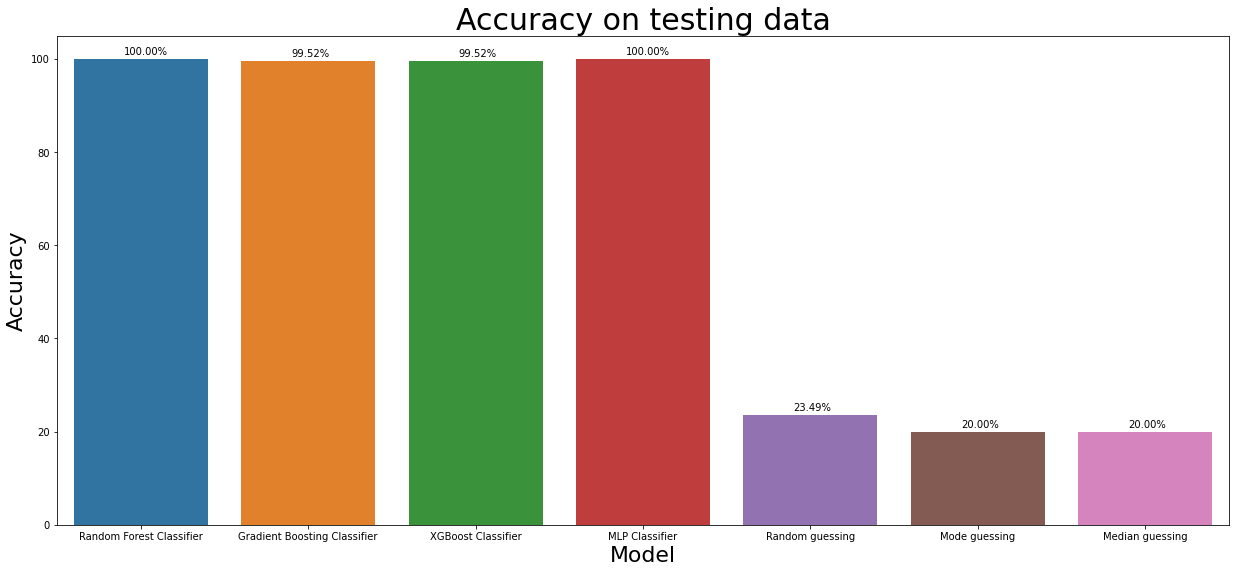

In [18]:
plt.figure(figsize=[21, 9])
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy on testing data", fontsize=30)
plt.ylabel("Accuracy", fontsize=22)
plt.xlabel("Model", fontsize=22)
xlocs=[i+1 for i in range(0,10)]
for i, j in enumerate(accuracies):
    acc_pct = "{:.2f}".format(j)
    plt.text(xlocs[i] - 1.1, j+1, str(acc_pct)+'%')

# create a small dataframe with model name that shows accuracy, precision, recall, runtime

# learning curve for each model? If curve needs data, maybe add synthetic data?

# Hyperparameter Tuning

# Figure out best model and do confusion matrix

# Feature importance to see what sleep features matter